# Example notebook for Ensemble of Zonal (lev-lon) diagnostic of temperature

##### This notebook demonsterates how the ensemble module can be used for Zonal data (lev-lon) temperature data from a single ensemble or multi-model ensemble memebers

In [1]:
import glob
import xarray as xr
from aqua.diagnostics.core import retrieve_merge_ensemble_data
from aqua.diagnostics import EnsembleZonal

In [2]:
# loading the data as xarray Datasets
# Here we are using two same files because we have only this file yet with same lev-lat
# loading the Zonal Datasets 
file_0 = '/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-NEMO/historical-1990/ocean3d_drift/netcdf/IFS-NEMO-historical-1990-lra-r100-monthly_zonal_mean_trend_atlantic_ocean.nc'
file_1 = '/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-NEMO/historical-1990/ocean3d_drift/netcdf/IFS-NEMO-historical-1990-lra-r100-monthly_zonal_mean_trend_atlantic_ocean.nc'
file_list = [file_0, file_1]

In [3]:
# path on lumi
# IFS-NEMO: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/ocean3d_drift/netcdf/IFS-NEMO-historical-1990-lra-r100-monthly_zonal_mean_trend_atlantic_ocean.nc

In [4]:
# merging the dataset along the dimension ens_dim
# ens_dim="ensemble" name can be changed. 
# It should remain consistent with the ensemble name for the EnsembleZonal class variable
ens_dataset = retrieve_merge_ensemble_data(variable='avg_so', data_path_list=file_list, log_level = "WARNING",ens_dim="ensemble")

In [5]:
plot_options = {
    'figure_size': [12,8], 'plot_label': True,
    'plot_std': True, 'unit': None,
    'mean_plot_title': 'Mean of Ensemble of Zonal average',
    'std_plot_title':  'Standard deviation of Ensemble of Zonal average',
    'cbar_label': 'temperature in K', 'dpi': 300
}

In [6]:
zonal_ens = EnsembleZonal(var='avg_so', dataset=ens_dataset, plot_options=plot_options)

In [7]:
zonal_ens.compute_statistics()

/work/ab0995/a270260/aqua/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


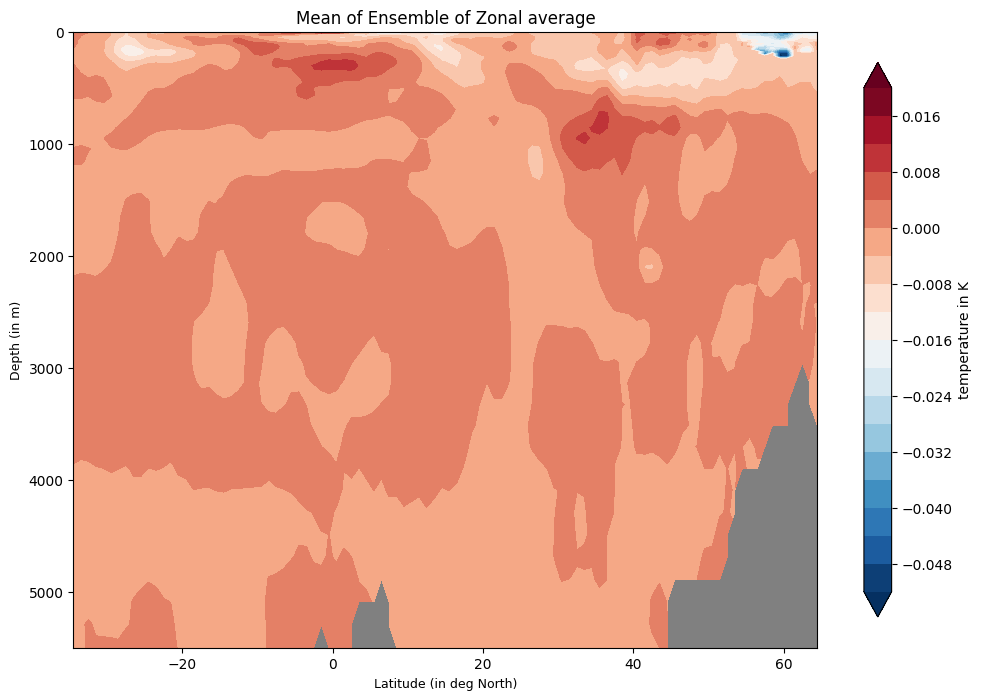

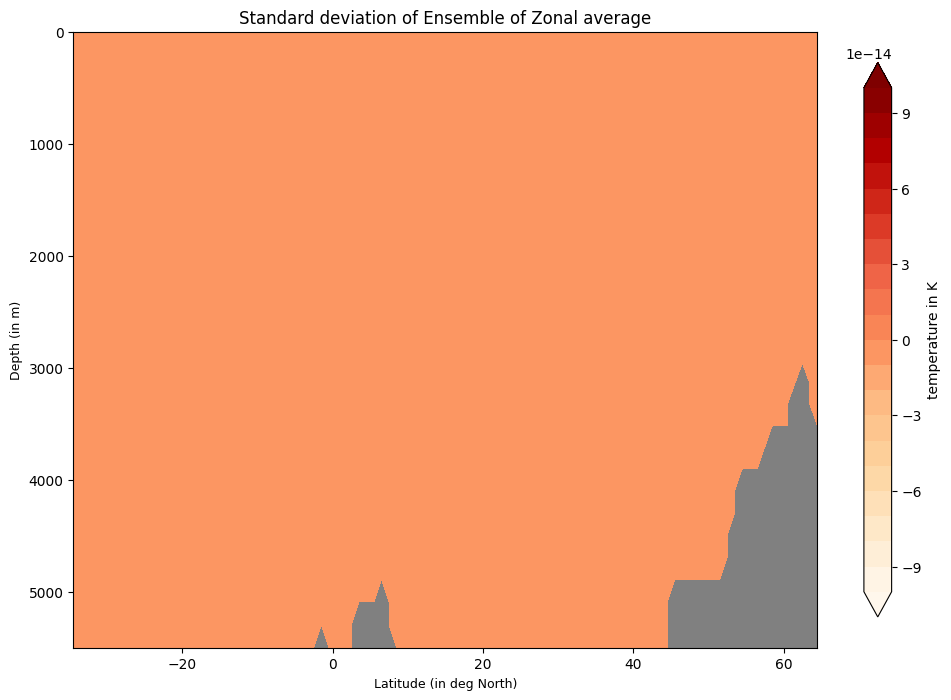

In [8]:
zonal_ens.plot()

In [9]:
zonal_ens.dataset_mean

<xarray.DataArray 'avg_so' (lev: 75, lat: 100)> Size: 60kB
array([[ 0.0027187 ,  0.00079101,  0.00021471, ..., -0.02185529,
        -0.01881303, -0.02083444],
       [ 0.00271641,  0.00078443,  0.00019752, ..., -0.02189137,
        -0.01884648, -0.02088786],
       [ 0.00269767,  0.00077687,  0.00018432, ..., -0.02189318,
        -0.01888041, -0.02091277],
       ...,
       [-0.00020461, -0.00027314,  0.00015111, ...,         nan,
                nan,         nan],
       [        nan,  0.00015082,  0.00015082, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], shape=(75, 100))
Coordinates:
  * lev      (lev) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * lat      (lat) float64 800B -34.5 -33.5 -32.5 -31.5 ... 61.5 62.5 63.5 64.5
Attributes:
    units:    g kg**-1/year

In [10]:
zonal_ens.dataset_std

<xarray.DataArray 'avg_so' (lev: 75, lat: 100)> Size: 60kB
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [nan,  0.,  0., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(75, 100))
Coordinates:
  * lev      (lev) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * lat      (lat) float64 800B -34.5 -33.5 -32.5 -31.5 ... 61.5 62.5 63.5 64.5
Attributes:
    units:    g kg**-1/year